In [1]:
import numpy as np
import pandas as pd
from numpy.fft import fft
from matplotlib import pyplot as plt
import math
import warnings,os
import glob
from scipy.signal import find_peaks
warnings.filterwarnings('ignore')

In [2]:
path="./data/11.1/material_classification_train_sets/"
folder_list = os.listdir(path)

In [3]:
folder_list

['alu_stand_contact',
 'alu_full_contact',
 'alu_bottom_edge_contact',
 'alu_point_contact']

Import dataset

In [5]:
file_size=10
def get_data(raw_data):
  data=raw_data.drop(["msg","time(second)"],axis=1)
  rot_data = data
  return rot_data
# concate all data to single file
for name_idx in range(len(folder_list)):
  df=[]
  for i in range(1,file_size+1):
    material=path+folder_list[name_idx]
    filename="/output_"+str(i)+".csv"
    temp=pd.read_csv(material+filename)
    temp=get_data(temp) # remove the unuse columns
    row_data=[]
    for row in range (len(temp)):
      row_data.append(temp.iloc[row].values)
    row_data=np.array(row_data).reshape((1,-1)).squeeze(axis=0)
    df.append(row_data)
  df=pd.DataFrame(df)
  material=path+folder_list[name_idx]
  df.transpose().to_csv(material+"/all_result.csv")
  print("finish"+folder_list[name_idx])

finishalu_stand_contact
finishalu_full_contact
finishalu_bottom_edge_contact
finishalu_point_contact


In [2]:
import random
def print_original_plot(name,path,outlier_delete=False):
  material=path+name
  filename="/all_result.csv"
  df=pd.read_csv(material+filename)
  df=df.dropna(axis=0) # drop the unconsistent data long
  df=df.drop(list(df)[0],axis=1)
  # print(df.describe())
  if outlier_delete:
    randomlist = random.sample(range(0, len(df)), 1000)
    for i in randomlist:
      mean = df.iloc[i].mean()
      std = df.iloc[i].std()

      z_scores = (df.iloc[i] - mean) / std

      mask = np.abs(z_scores) > 5
      # print(mask)
      drop_col=[]
      for i in range(len(mask)):
        if mask[i]:
          drop_col.append(df.columns[i])
      df.drop(drop_col,axis=1, inplace=True)
  
  # print(df.shape)
  # # print(df)
  # df.plot(kind='line',alpha=0.5, figsize=(10, 4),title=name+' orignal data plot',legend=False)
  # df.plot(kind='hist',alpha=0.5, figsize=(10, 10),title=name+" orignal data plot",legend=False)
  return df

In [18]:
path="./data/11.1/material_classification_train_sets/"
folder_list = os.listdir(path)
df_all=pd.DataFrame()
# labellist=['alu_hollow_thick','alu_hollow_thin','alu','brass_hollow','brass','printpla','pla','printresin','wood']
# labellist=['brass_hollow','brass','printpla','pla','printresin','wood']
# labellist=['alu','brass','printpla','pla','printresin','wood']
labellist=folder_list
# labellist=['center','edge','middle']
# labellist=['full','stand','point']
# labellist=['1','2']
for name in folder_list:
  df_temp=print_original_plot(name=name,path=path)
  label=""
  for i in labellist:
    if i == name :
      label=i
      break
  if (label==''): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  df_all = pd.concat([df_all, df_temp], axis=1)


bra_hollow bra_hollow
bra bra
alu_thick_hollow alu_thick_hollow
pla pla
woo woo
alu_thin_hollow alu_thin_hollow
printpla printpla
printresin printresin
alu alu


In [126]:
df_all.plot(kind='line',alpha=0.5, figsize=(10, 4),title=name+' orignal data plot')
# df_all.plot(kind='hist',alpha=0.5, figsize=(10, 10),title=name+" orignal data plot",legend=False)

<Axes: title={'center': 'alu_hollow_thin orignal data plot'}>

Error in callback <function _draw_all_if_interactive at 0x739fb41c7e20> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [19]:
df_all2=pd.DataFrame()
path_2="./data/10.30material_classification/"
folder_list_2 = os.listdir(path_2)
for name in folder_list_2:
  # if ('2' in name ): continue
  df_temp=print_original_plot(name=name,path=path_2)
  label=""
  for i in labellist:
    if i == name :
      label=i
      break
  if (label==''): continue
  print(label,name)
  df_temp.loc['label']=[labellist.index(label) for _ in list(df_temp)]
  df_all2 = pd.concat([df_all2, df_temp], axis=1,ignore_index=True)

bra_hollow bra_hollow
bra bra
alu_thick_hollow alu_thick_hollow
pla pla
woo woo
alu_thin_hollow alu_thin_hollow
printpla printpla
printresin printresin
alu alu


In [20]:
df_all=df_all.dropna(axis=0)
df_all2=df_all2.dropna(axis=0)


In [238]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,18.0,84.0,32.0,-24.0,29.0,-12.0,-25.0,147.0,76.0,-37.0,...,46.0,-16.0,-55.0,90.0,10.0,3.0,18.0,90.0,54.0,-50.0
1,18.0,-93.0,-31.0,-11.0,14.0,-8.0,-79.0,-121.0,-82.0,4.0,...,49.0,20.0,32.0,-116.0,-45.0,5.0,64.0,-59.0,-97.0,80.0
2,15.0,142.0,-10.0,3.0,13.0,-1.0,85.0,129.0,75.0,4.0,...,45.0,-9.0,-76.0,80.0,0.0,9.0,15.0,111.0,94.0,-54.0
3,15.0,-122.0,8.0,-31.0,28.0,-7.0,-173.0,-71.0,-54.0,-38.0,...,46.0,0.0,41.0,-78.0,-28.0,6.0,58.0,-57.0,-118.0,67.0
4,13.0,144.0,-51.0,20.0,-7.0,-2.0,155.0,58.0,42.0,42.0,...,47.0,9.0,-73.0,20.0,-19.0,7.0,26.0,82.0,79.0,-24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43260,-24.0,-26.0,128.0,99.0,18.0,-15.0,-50.0,-44.0,-50.0,30.0,...,-18.0,-15.0,10.0,26.0,13.0,-26.0,-36.0,18.0,-11.0,24.0
43261,28.0,77.0,-28.0,-12.0,32.0,18.0,52.0,32.0,95.0,-67.0,...,4.0,5.0,8.0,23.0,27.0,-49.0,-15.0,35.0,-7.0,0.0
43262,-22.0,-7.0,73.0,88.0,-36.0,-16.0,-45.0,-65.0,-41.0,55.0,...,-18.0,-8.0,5.0,32.0,5.0,-41.0,-33.0,21.0,-12.0,18.0
43263,14.0,54.0,46.0,14.0,78.0,14.0,25.0,39.0,61.0,-67.0,...,-2.0,-2.0,9.0,14.0,34.0,-36.0,-19.0,34.0,-19.0,12.0


In [29]:
df_all2

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,18.0,207.0,129.0,75.0,83.0,21.0,225.0,126.0,67.0,93.0,...,119.0,55.0,144.0,48.0,171.0,24.0,206.0,53.0,237.0,38.0
1,14.0,281.0,121.0,118.0,87.0,17.0,163.0,101.0,80.0,44.0,...,114.0,50.0,151.0,36.0,160.0,24.0,210.0,44.0,211.0,44.0
2,19.0,261.0,71.0,125.0,98.0,15.0,83.0,175.0,53.0,90.0,...,89.0,75.0,149.0,55.0,179.0,28.0,195.0,35.0,179.0,45.0
3,28.0,163.0,94.0,91.0,73.0,16.0,194.0,182.0,45.0,103.0,...,7.0,68.0,128.0,60.0,175.0,30.0,190.0,62.0,214.0,37.0
4,25.0,160.0,148.0,75.0,67.0,15.0,240.0,128.0,79.0,82.0,...,10.0,52.0,123.0,50.0,163.0,34.0,208.0,71.0,225.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,305.0,265.0,99.0,423.0,379.0,322.0,147.0,150.0,98.0,392.0,...,16.0,28.0,10.0,86.0,38.0,24.0,41.0,43.0,274.0,170.0
10997,267.0,288.0,145.0,390.0,400.0,296.0,133.0,135.0,121.0,409.0,...,18.0,27.0,17.0,78.0,36.0,24.0,47.0,40.0,288.0,150.0
10998,347.0,228.0,133.0,459.0,359.0,322.0,117.0,113.0,99.0,351.0,...,22.0,35.0,26.0,71.0,37.0,21.0,51.0,45.0,300.0,143.0
10999,219.0,290.0,102.0,447.0,366.0,212.0,161.0,157.0,123.0,384.0,...,24.0,38.0,31.0,59.0,38.0,23.0,55.0,50.0,306.0,137.0


In [66]:
def fft_self(df):
    data_rows = df.iloc[:-1, :]  # All rows except the last
    label_row = df.iloc[-1, :]    # Last row (label)

    # Apply FFT on each column except the last row
    fft_result = data_rows.apply(lambda col: np.abs(np.fft.fft(col)), axis=0)

    # Append the label row to the FFT result
    fft_result.loc['label'] = label_row
    return fft_result

In [67]:
df_all = pd.concat([df_all.iloc[:42000], df_all.iloc[[-1]]], axis=0,ignore_index = True)
df_all2 = pd.concat([df_all2.iloc[:42000], df_all2.iloc[[-1]]], axis=0,ignore_index = True)
df_all=fft_self(df_all)
df_all2=fft_self(df_all2)

In [21]:
def positive_find_peak(df):
    df.columns=[i for i in range(df.shape[1])]
    data_rows = df.iloc[:-1, :]  # All rows except the last
    label_row = df.iloc[-1, :]    # Last row (label)
    def pfp(singleCol):
        data_positive=np.abs(singleCol)
        peaks_idx,_=find_peaks(data_positive)
        return data_positive[peaks_idx]
    new=pd.DataFrame()
    for column in data_rows:
        data=np.array(data_rows[column])
        df_temp=pd.DataFrame(pfp(data))
        new = pd.concat([new, df_temp], axis=1,ignore_index=True)
    
    new.loc['label']=label_row
    # print(new)
    return new

In [22]:
df_=positive_find_peak(df_all.copy())
df_drop=df_.dropna(axis=0)
df_all=pd.concat([df_drop.iloc[:11000], df_drop.iloc[[-1]]], axis=0)

df_=positive_find_peak(df_all2.copy())
df_drop=df_.dropna(axis=0)
df_all2=pd.concat([df_drop.iloc[:11000], df_drop.iloc[[-1]]], axis=0)

In [8]:
df_all

,0,1,2,3,4,5,6,7,8,9,...,890,891,892,893,894,895,896,897,898,899
0,18.0,142.0,51.0,31.0,28.0,7.0,173.0,129.0,82.0,57.0,...,49.0,20.0,76.0,116.0,45.0,9.0,64.0,111.0,97.0,80.0
1,22.0,144.0,78.0,46.0,40.0,8.0,208.0,151.0,84.0,59.0,...,47.0,37.0,73.0,104.0,28.0,7.0,58.0,82.0,118.0,67.0
2,22.0,131.0,75.0,33.0,27.0,5.0,160.0,142.0,83.0,63.0,...,50.0,32.0,48.0,115.0,41.0,12.0,49.0,42.0,108.0,80.0
3,24.0,157.0,44.0,18.0,16.0,3.0,155.0,152.0,86.0,70.0,...,54.0,38.0,53.0,68.0,53.0,8.0,67.0,95.0,115.0,73.0
4,26.0,149.0,55.0,33.0,23.0,9.0,213.0,147.0,83.0,78.0,...,54.0,55.0,86.0,115.0,49.0,8.0,69.0,109.0,71.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,75.0,84.0,192.0,44.0,186.0,38.0,113.0,38.0,295.0,211.0,...,16.0,52.0,54.0,30.0,47.0,14.0,38.0,10.0,31.0,7.0
10997,75.0,91.0,186.0,52.0,185.0,45.0,113.0,35.0,299.0,210.0,...,15.0,47.0,47.0,36.0,41.0,13.0,37.0,16.0,36.0,8.0
10998,74.0,94.0,178.0,54.0,189.0,53.0,104.0,35.0,306.0,216.0,...,13.0,44.0,49.0,28.0,45.0,11.0,35.0,15.0,38.0,7.0
10999,69.0,94.0,170.0,62.0,189.0,52.0,105.0,39.0,311.0,221.0,...,5.0,37.0,41.0,31.0,41.0,7.0,35.0,25.0,38.0,5.0


In [9]:
df_all2

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,18.0,207.0,129.0,75.0,83.0,21.0,225.0,126.0,67.0,93.0,...,119.0,55.0,144.0,48.0,171.0,24.0,206.0,53.0,237.0,38.0
1,14.0,281.0,121.0,118.0,87.0,17.0,163.0,101.0,80.0,44.0,...,114.0,50.0,151.0,36.0,160.0,24.0,210.0,44.0,211.0,44.0
2,19.0,261.0,71.0,125.0,98.0,15.0,83.0,175.0,53.0,90.0,...,89.0,75.0,149.0,55.0,179.0,28.0,195.0,35.0,179.0,45.0
3,28.0,163.0,94.0,91.0,73.0,16.0,194.0,182.0,45.0,103.0,...,7.0,68.0,128.0,60.0,175.0,30.0,190.0,62.0,214.0,37.0
4,25.0,160.0,148.0,75.0,67.0,15.0,240.0,128.0,79.0,82.0,...,10.0,52.0,123.0,50.0,163.0,34.0,208.0,71.0,225.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10996,305.0,265.0,99.0,423.0,379.0,322.0,147.0,150.0,98.0,392.0,...,16.0,28.0,10.0,86.0,38.0,24.0,41.0,43.0,274.0,170.0
10997,267.0,288.0,145.0,390.0,400.0,296.0,133.0,135.0,121.0,409.0,...,18.0,27.0,17.0,78.0,36.0,24.0,47.0,40.0,288.0,150.0
10998,347.0,228.0,133.0,459.0,359.0,322.0,117.0,113.0,99.0,351.0,...,22.0,35.0,26.0,71.0,37.0,21.0,51.0,45.0,300.0,143.0
10999,219.0,290.0,102.0,447.0,366.0,212.0,161.0,157.0,123.0,384.0,...,24.0,38.0,31.0,59.0,38.0,23.0,55.0,50.0,306.0,137.0


In [90]:
row_select=[]
idx=1000
gap=1
while(idx<(len(df_all)-1)):
  row_select.append(idx)
  idx+=gap
row_select.append(len(df_all)-1)

In [91]:
# df_all=df_all.iloc[row_select]
# df_all2=df_all2.iloc[row_select]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import KernelPCA
from sklearn.neural_network import MLPClassifier

In [24]:
df = df_all.T
X=df.drop("label",axis=1)
y=df["label"].astype(int)
df2 = df_all2.T
X2=df2.drop("label",axis=1)
y2=df2["label"].astype(int)

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)
# checkgroup=random.randint(1,19)
# test_idx=[5*(checkgroup-g)+i+j*100 for i in range(5) for j in range(0,9) for g in range(2)]
# train_idx=[]
# for i in range(900):
#     if i not in test_idx:
#         train_idx.append(i)
# X_train=X.iloc[train_idx]
# y_train=y[train_idx]
# X_test=X.iloc[test_idx]
# y_test=y[test_idx]
X_train, X_test, y_train, y_test = X,X2,y,y2
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)
# kernel_pca = KernelPCA(kernel='poly')
# kpca=kernel_pca.fit(X_train)
# X_train=kpca.transform(X_train)
# X_test = kpca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# clf = svm.SVC()
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
# y_pred=clf.predict(X_test)


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_single(x,y,gap=100):
    data = pd.DataFrame(x).copy()  # All rows except the last one (data points)
    labels = y.copy()  # Last row (labels for each column)

    # Define colors for each of the 9 labels
    label_colors = {
        0: 'red', 1: 'blue', 2: 'green', 3: 'purple',
        4: 'orange', 5: 'brown', 6: 'pink', 7: 'cyan', 8: 'grey'
    }

    fig, ax = plt.subplots(figsize=(10, 4))
    for i in range(len(data)):
        if(i%gap!=0):continue
        label = labels.iloc[i]  # Get the label for the current row
        color = label_colors[label]  # Get the corresponding color
        data.iloc[i].plot(kind='line', ax=ax, color=color, alpha=0.8, label=labellist[label])  # Avoid repeating legend entries
    # Customize plot
    ax.set_ylim(0, 6000)
    plt.title('Raw data after self method')
    plt.legend(title="Labels", loc="upper right")
    plt.show()

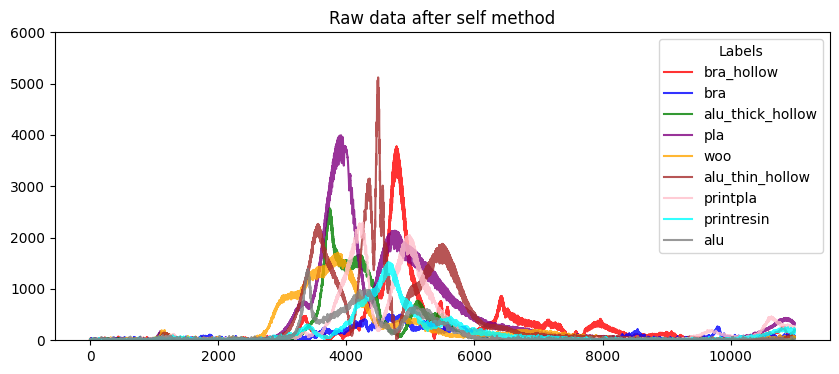

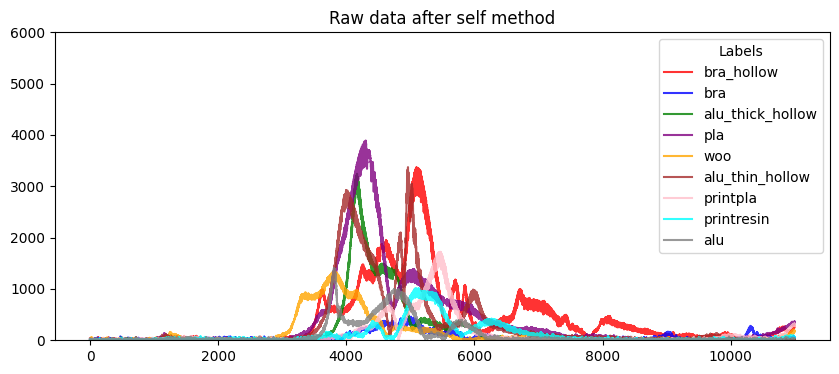

In [34]:
plot_single(X_train,y_train,100)
plot_single(X_test,y_test,10)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 43.33%


In [27]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=labellist))
temp=classification_report(y_test, y_pred, target_names=labellist, output_dict=True)
output=pd.DataFrame(temp)

Classification Report:
                  precision    recall  f1-score   support

      bra_hollow       1.00      1.00      1.00        10
             bra       0.50      1.00      0.67        10
alu_thick_hollow       1.00      0.90      0.95        10
             pla       0.00      0.00      0.00        10
             woo       1.00      1.00      1.00        10
 alu_thin_hollow       0.00      0.00      0.00        10
        printpla       0.00      0.00      0.00        10
      printresin       0.00      0.00      0.00        10
             alu       0.00      0.00      0.00        10

        accuracy                           0.43        90
       macro avg       0.39      0.43      0.40        90
    weighted avg       0.39      0.43      0.40        90



In [78]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

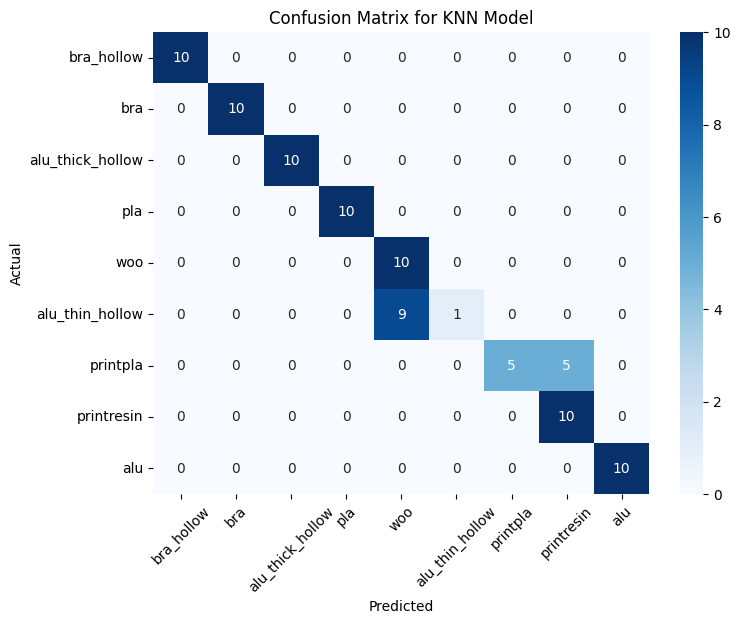

In [79]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labellist, yticklabels=labellist)
plt.xlabel('Predicted',)
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model')
plt.show()

In [165]:
output.T.to_csv('contact_withoutPoint_train_11_04_test_11_04_after_fft.csv')

In [72]:
import pickle 
pickle.dump(knn, open("Knn_train_11_01", 'wb'))

In [73]:
my_model_clf = pickle.load(open("Knn_train_11_01", 'rb')) 
result_score = my_model_clf.score(X_test,y_test) 
print("Score: ",result_score)

Score:  0.8777777777777778


In [232]:
X.shape

(900, 11000)

In [233]:
X_test.shape

(900, 11000)

In [234]:
X_train.shape

(900, 11000)